<a href="https://colab.research.google.com/github/JanithaB/Tribo-Sensor/blob/main/First_encounter_test02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ast
import copy

In [53]:
#Read data from the gdrive
# Path to your text file
file_01 = '/content/drive/My Drive/First_encounter/x_train.txt'
file_02 = '/content/drive/My Drive/First_encounter/not_y_train.txt'
file_03 = '/content/drive/My Drive/First_encounter/x_test.txt'
file_04 = '/content/drive/My Drive/First_encounter/not_y_test.txt'

# Read the text file
with open(file_01, 'r') as file:
    x_train = file.read()
with open(file_02, 'r') as file:
    y_train = file.read()
with open(file_03, 'r') as file:
    x_test = file.read()
with open(file_04, 'r') as file:
    y_test = file.read()

x_train = ast.literal_eval(x_train)
x_train = np.array(x_train, dtype=np.float32).T

y_train = ast.literal_eval(y_train)
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(1,19)

x_test = ast.literal_eval(x_test)
x_test = np.array(x_test, dtype=np.float32).T

y_test = ast.literal_eval(y_test)
y_test = np.array(y_test, dtype=np.float32)
y_test = y_test.reshape(1,6)

#print(x_train.shape)
#print(y_train.shape)
print(x_test)
#print(y_test.shape)

[[ 678.  678. 1023.  677.  678.  680.]
 [ 677.  677. 1023.  677.  677.  679.]
 [ 677.  677. 1023.  677.  676.  678.]
 ...
 [ 600.  600.  600.  600.  600.  600.]
 [ 600.  600.  600.  600.  600.  600.]
 [ 600.  600.  600.  600.  600.  600.]]


In [73]:
#Loading the dataset (walking/running)
train_set_x_orig = x_train.T
train_set_y      = y_train
test_set_x_orig  = x_test.T
test_set_y       = y_test

In [ ]:
x_val = list(range(1,901))

#test index
index = 18

plt.plot(x_val,train_set_x_orig[index])
plt.xlabel("Number of Values")
plt.ylabel("Y Value")
plt.title("Y Value vs Number of Values")
plt.grid(True)
plt.show()

In [55]:
#Normalizing data
import scipy.stats as stats

x_train_norm = stats.zscore(x_train, axis=0)
x_test_norm = stats.zscore(x_test, axis=0)
print(x_test_norm.shape)

(900, 6)


In [56]:
#Sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1+np.exp(-z))


    return s

In [57]:
#Initialize with zeros
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    w = np.zeros(shape=(dim, 1))
    b = 0.0


    return w, b

In [58]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (900, 1)
    b -- bias, a scalar
    X -- data of size (900, number of examples)
    Y -- true "label" vector (containing 0 if walking, 1 if running) of size (1, number of examples)

    Return:
    grads -- dictionary containing the gradients of the weights and bias
            (dw -- gradient of the loss with respect to w, thus same shape as w)
            (db -- gradient of the loss with respect to b, thus same shape as b)
    cost -- negative log-likelihood cost for logistic regression

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication.
    # And don't use loops for the sum.
    # cost = ...                𝐴=𝜎(𝑤𝑇𝑋+𝑏)     𝐽=−1𝑚∑𝑚𝑖=1(𝑦(𝑖)log(𝑎(𝑖))+(1−𝑦(𝑖))log(1−𝑎(𝑖)))
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m)* np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))

    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = (1/m) * (np.dot(X,(A-Y).T))
    db = (1/m) * (np.sum(A-Y))
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [60]:

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (900, 1)
    b -- bias, a scalar
    X -- data of shape (900, number of examples)
    Y -- true "label" vector (containing 0 if walking, 1 if running), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)

        # YOUR CODE ENDS HERE

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)

        # YOUR CODE ENDS HERE

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [61]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (900, 1)
    b -- bias, a scalar
    X -- data of size (900, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b)

    # YOUR CODE ENDS HERE

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

        # YOUR CODE ENDS HERE

    return Y_prediction

In [62]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)
    # initialize parameters with zeros
    # and use the "shape" function to get the first dimension of X_train
    # w, b = ...

    #(≈ 1 line of code)
    # Gradient descent
    # params, grads, costs = ...

    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...

    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # YOUR CODE STARTS HERE
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test =  predict(w, b, X_test)
    Y_prediction_train =  predict(w, b,  X_train)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [65]:
logistic_regression_model = model(x_train_norm, y_train, x_test_norm, y_test, num_iterations=2000, learning_rate=0.05, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.002708
Cost after iteration 200: 0.001365
Cost after iteration 300: 0.000913
Cost after iteration 400: 0.000686
Cost after iteration 500: 0.000549
Cost after iteration 600: 0.000458
Cost after iteration 700: 0.000393
Cost after iteration 800: 0.000344
Cost after iteration 900: 0.000306
Cost after iteration 1000: 0.000275
Cost after iteration 1100: 0.000250
Cost after iteration 1200: 0.000229
Cost after iteration 1300: 0.000212
Cost after iteration 1400: 0.000197
Cost after iteration 1500: 0.000184
Cost after iteration 1600: 0.000172
Cost after iteration 1700: 0.000162
Cost after iteration 1800: 0.000153
Cost after iteration 1900: 0.000145
train accuracy: 100.0 %
test accuracy: 50.0 %


y = 1.0, you predicted that it is a 1.0



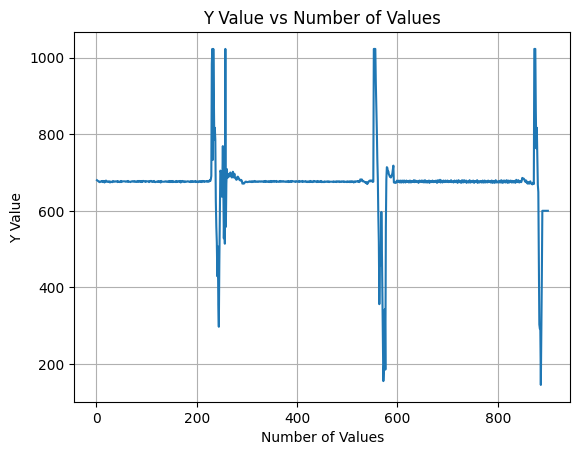

In [101]:
x_val = list(range(1,901))

with open(file_03, 'r') as file:
    test_set_x_orig = file.read()

test_set_x_orig = ast.literal_eval(test_set_x_orig)
test_set_x_orig = np.array(x_test, dtype=np.float32).T

#--------------------------------------------------------
index = 5
#--------------------------------------------------------
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a " + str(logistic_regression_model['Y_prediction_test'][0,index])+"\n" )

plt.plot(x_val,test_set_x_orig[index])
plt.xlabel("Number of Values")
plt.ylabel("Y Value")
plt.title("Y Value vs Number of Values")
plt.grid(True)
plt.show()

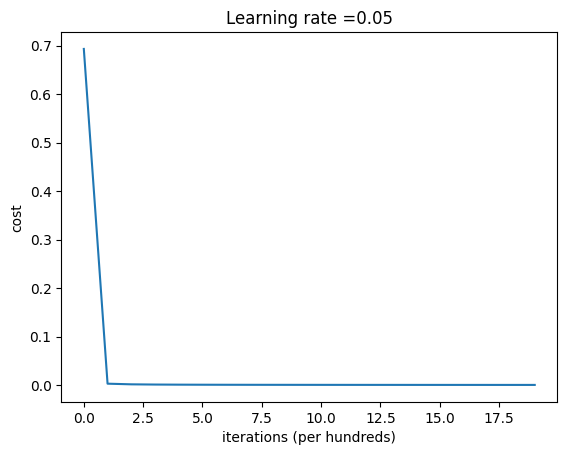

In [97]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()